In [10]:
import zipfile
import os
import glob 
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import keras
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
! pip install -q kaggle

In [3]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adampamungkas","key":"cbf005a456dc62e26fef1a576514663d"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d tongpython/cat-and-dog

100% 217M/218M [00:10<00:00, 24.6MB/s]
100% 218M/218M [00:10<00:00, 22.1MB/s]


In [6]:
!mkdir cat-and-dog
!unzip cat-and-dog.zip -d cat-and-dog
!ls cat-and-dog

Streaming output truncated to the last 5000 lines.
  inflating: cat-and-dog/training_set/training_set/cats/cat.3705.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3706.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3707.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3708.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3709.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.371.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3710.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3711.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3712.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3713.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3714.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3715.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3716.jpg  
  inflating: cat-and-dog/tr

In [7]:
test_path = os.path.join('cat-and-dog/test_set/test_set')
train_path = os.path.join('cat-and-dog/training_set/training_set')

In [11]:
image_size = (200, 200)
batch_size = 32

training_set = image_dataset_from_directory(
    directory=train_path,
    class_names=['cats', 'dogs'],
    image_size=image_size,
    batch_size=batch_size
)

test_set = image_dataset_from_directory(
    directory=test_path,
    class_names=['cats', 'dogs'],
    image_size=image_size,
    batch_size=batch_size,
    
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [12]:
augmented_data = Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1)
])

In [13]:
# build the model
model = Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(200, 200, 3)),
    layers.CenterCrop(180, 180),
    layers.Rescaling(scale=1./255),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 128)     3584      
                                                                 
 center_crop (CenterCrop)    (None, 180, 180, 128)     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 128)     0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 180, 180, 128)     0         
                                                                 
 random_rotation_1 (RandomRo  (None, 180, 180, 128)    0         
 tation)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 128)      0         
 )                                                    

In [17]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=0, write_graph=True, write_images=False,
    update_freq='epoch', embeddings_freq=0,
    embeddings_metadata=None
)

In [18]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [19]:
history = model.fit(training_set, 
          validation_data=test_set, 
          epochs=50, 
          callbacks =[lr_schedule, tb_callback], 
          verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
251/251 - 77s - loss: 0.6489 - accuracy: 0.6244 - val_loss: 0.6275 - val_accuracy: 0.6466 - lr: 0.0010 - 77s/epoch - 308ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
251/251 - 74s - loss: 0.5983 - accuracy: 0.6755 - val_loss: 0.5872 - val_accuracy: 0.6831 - lr: 0.0010 - 74s/epoch - 296ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/50
251/251 - 74s - loss: 0.5824 - accuracy: 0.6967 - val_loss: 0.5878 - val_accuracy: 0.6985 - lr: 0.0010 - 74s/epoch - 295ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/50
251/251 - 74s - loss: 0.5553 - accuracy: 0.7133 - val_loss: 0.5850 - val_accuracy: 0.6807 - lr: 0.0010 - 74s/epoch - 294ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/50
251/251 - 74s - loss: 0.5256 - ac

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Mengambil Nilai Loss 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

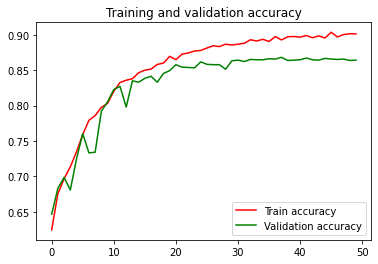

<Figure size 432x288 with 0 Axes>

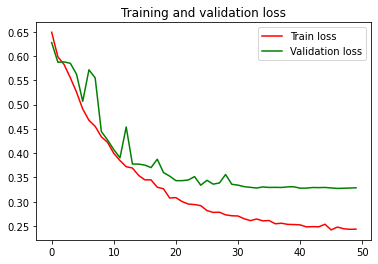

<Figure size 432x288 with 0 Axes>

In [21]:
# Plot Accruracy
plt.plot(epochs, acc, 'r', label='Train accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Plot Loss
plt.plot(epochs, loss, 'r', label='Train loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [24]:
warnings.filterwarnings('ignore')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('dog&cat.tflite', 'wb') as f:
  f.write(tflite_model)